In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from   scipy.special import factorial, gamma, gammainc
from scipy.optimize import curve_fit
from scipy.stats import chisquare

In [47]:
def chi_square_metrics(expected, observed) -> float:
    #print(observed.var()), .var()
    return ((expected - observed) ** 2 / observed).sum()

In [2]:
sns.set_style('darkgrid')

In [3]:
data_2 = pd.read_csv('Untitled spreadsheet - Sheet1 (1).csv')

In [4]:
data_2.head()

,t,p,t1,p1
0,0,0.65,0.0,4.2
1,4,0.66,1.0,3.7
2,6,0.67,1.5,3.3
3,8,0.69,2.0,2.9
4,9,0.73,2.5,2.6


Text(0, 0.5, 'p, торр $\\cdot 10^{-4}$')

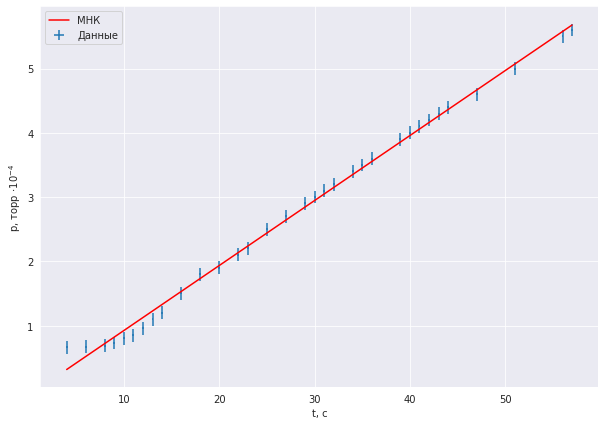

In [5]:
plt.figure(figsize=(10, 7))

plt.errorbar(data_2['t'][1:], data_2['p'][1:], xerr=0.1, yerr=0.1, linestyle = '', label = 'Данные')

 
k0, b0 = np.polyfit(data_2['t'][1:], data_2['p'][1:], 1) 

plt.plot(data_2['t'][1:], data_2['t'][1:] * k0 + b0, color = 'red', label = 'МНК', )

plt.xlabel('Время t(c)')
plt.ylabel('Давление, мм.рт.стлб * 10^-4')
plt.legend()


plt.xlabel('t, с')
plt.ylabel(r'p, торр $\cdot 10^{-4}$')

In [52]:
chi_square_metrics(data_2['t'], data_2['t'])

0.0

In [46]:
print(chi_square_metrics(data_2['t'][1:] * k0 + b0, data_2['p'][1:]))
print(chisquare(data_2['p'][1:] ,data_2['t'][1:] * k0 + b0))

2.3424954545454546
0.1371799501745049
Power_divergenceResult(statistic=0.5444022433028499, pvalue=1.0)


In [26]:
data_2['t'][1:].shape

(33,)

In [6]:
print(k0)

0.10115089684049612


Text(0, 0.5, 'p, торр $\\cdot 10^{-4}$')

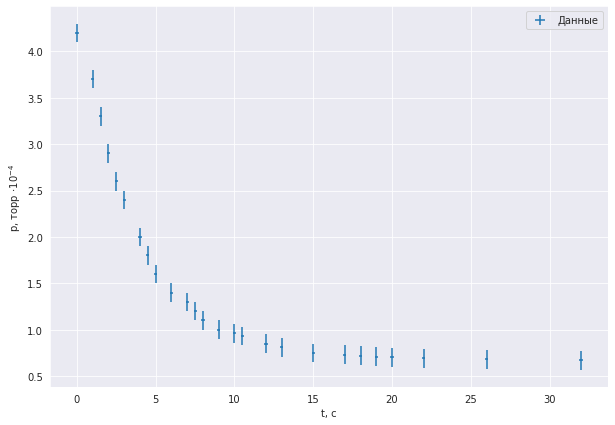

In [7]:
plt.figure(figsize=(10, 7))

plt.errorbar(data_2['t1'].dropna(), data_2['p1'].dropna(), xerr=0.1, yerr=0.1, linestyle = '', label = 'Данные')

 
#k0, b0 = np.polyfit(data_2['t'][1:], data_2['p'][1:], 1) 

#plt.plot(data_2['t'][1:], data_2['t'][1:] * k0 + b0, color = 'red', label = 'МНК', )

plt.xlabel('Время t(c)')
plt.ylabel('Давление, мм.рт.стлб * 10^-4')
plt.legend()


plt.xlabel('t, с')
plt.ylabel(r'p, торр $\cdot 10^{-4}$')

In [41]:
print(k0)

0.10115089684049612


In [9]:
data_2['p1'] -= data_2['p1'].min()

In [48]:
data_2['p1'].dropna()[:-1].value_counts

<bound method IndexOpsMixin.value_counts of 0     3.53
1     3.03
2     2.63
3     2.23
4     1.93
5     1.73
6     1.33
7     1.13
8     0.93
9     0.73
10    0.63
11    0.53
12    0.43
13    0.33
14    0.29
15    0.26
16    0.18
17    0.14
18    0.08
19    0.06
20    0.05
21    0.04
22    0.03
23    0.02
24    0.01
Name: p1, dtype: float64>

/home/matthew/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, '$\\log(p - p_{крит})$, $ \\cdot 10^{-4}$')

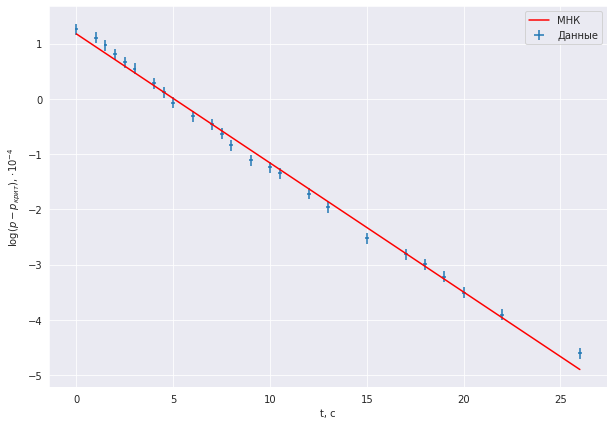

In [11]:
plt.figure(figsize=(10, 7))

plt.errorbar(data_2['t1'].dropna()[:-1], np.log(data_2['p1'].dropna())[:-1], xerr=0.1, yerr=0.1, linestyle = '', label = 'Данные')

 
k1, b1 = np.polyfit(data_2['t1'].dropna()[:-1], np.log(data_2['p1'].dropna())[:-1], 1) 

plt.plot(data_2['t1'].dropna()[:-1], data_2['t1'].dropna()[:-1] * k1 + b1, color = 'red', label = 'МНК', )

plt.xlabel('Время t(c)')
plt.ylabel('log(p)')
plt.legend()


plt.xlabel('t, с')
plt.ylabel(r'$\log(p - p_{крит})$, $ \cdot 10^{-4}$')

In [51]:
chi_square_metrics(data_2['t1'].dropna()[:-1] * k1 + b1, np.log(data_2['p1'].dropna())[:-1])

-0.13486355323367102

In [12]:
k1

-0.23356578722470805